In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

print("---------- First 5 Rows ----------")
print(df.head())

print("\n---------- Data Info ----------")
df.info()

---------- First 5 Rows ----------
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010  


---------- Class Distribution ----------
Class
0    284315
1       492
Name: count, dtype: int64


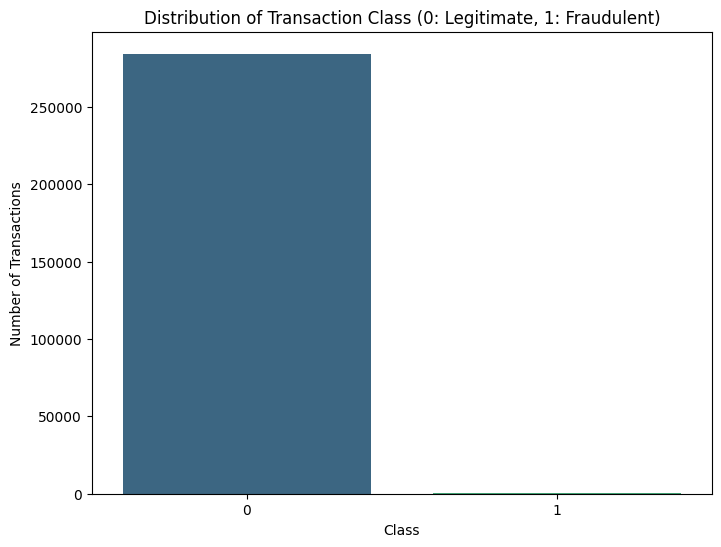

In [3]:
print("\n---------- Class Distribution ----------")
print(df['Class'].value_counts())

plt.figure(figsize=(8, 6))

sns.countplot(x='Class', data=df, hue='Class', palette='viridis', legend=False) 
plt.title('Distribution of Transaction Class (0: Legitimate, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

print("\n'Time' and 'Amount' columns have been scaled.")


'Time' and 'Amount' columns have been scaled.


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

print("Baseline model trained successfully.")

Baseline model trained successfully.


In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_baseline = baseline_model.predict(X_test)

print(f"Baseline Model Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

Baseline Model Accuracy: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [8]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [11]:
genuine = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

genuine_sampled = genuine.sample(n=len(fraud), random_state=42)

balanced_df = pd.concat([genuine_sampled, fraud])

print("--- New Balanced Class Distribution ---")
print(balanced_df['Class'].value_counts())

--- New Balanced Class Distribution ---
Class
0    492
1    492
Name: count, dtype: int64


In [12]:
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

final_model = LogisticRegression()
final_model.fit(X_train_b, y_train_b)

final_predictions = final_model.predict(X_test) 

final_accuracy = accuracy_score(y_test, final_predictions) 
print(f"--- Final Model Accuracy ---")
print(f"Accuracy: {final_accuracy * 100:.2f}%")

print("\n--- Final Classification Report ---")
print(classification_report(y_test, final_predictions))

--- Final Model Accuracy ---
Accuracy: 96.25%

--- Final Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

smote_model = LogisticRegression(random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

y_pred_smote = smote_model.predict(X_test)

print(f"\nSMOTE Model Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\nClassification Report (After SMOTE):")
print(classification_report(y_test, y_pred_smote))


SMOTE Model Accuracy: 0.9743

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

